In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
from datetime import datetime

In [149]:
df = pd.read_csv("weatherreadings1.csv")

In [150]:
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [151]:
df.describe()

,collectionName,observationType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,...,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,longitude,latitude,height,externalSiteId,version,externalId
count,89.0,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,8.900000e+01,8.900000e+01,89.0,8.900000e+01,89.0,8.900000e+01
mean,1.0,1.0,188.292135,85.135955,2.866067,1.281245,53.030337,11.683521,50.375281,10.208489,...,29.962416,1014.643950,48.606742,9.225968,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257823e+10
std,0.0,0.0,144.536579,5.626101,2.637010,1.178847,3.373102,1.873946,2.165236,1.202909,...,0.036299,1.229232,1.627240,0.904022,1.786421e-15,5.716548e-14,0.0,0.000000e+00,0.0,3.879131e+05
min,1.0,1.0,0.000000,70.400000,0.000000,0.000000,48.500000,9.166667,47.200000,8.444444,...,29.867000,1011.412803,46.000000,7.777778,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257757e+10
25%,1.0,1.0,40.000000,79.900000,1.000000,0.447039,50.500000,10.277778,48.800000,9.333333,...,29.947000,1014.121914,47.400000,8.555556,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257790e+10
50%,1.0,1.0,275.000000,87.200000,2.000000,0.894079,51.500000,10.833333,49.600000,9.777778,...,29.963000,1014.663736,48.300000,9.055556,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257824e+10
75%,1.0,1.0,333.000000,89.400000,3.750000,1.676397,55.800000,13.222222,52.000000,11.111111,...,29.991000,1015.611925,49.600000,9.777778,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257857e+10
max,1.0,1.0,359.000000,92.400000,14.250000,6.370309,60.700000,15.944444,54.700000,12.611111,...,30.015000,1016.424658,51.800000,11.000000,-8.854500e+00,5.352440e+01,45.0,1.000013e+09,1.0,1.257889e+10


In [152]:
df["createdDateTime"]

0     2024-10-02T16:15:28.5671119+00:00
1     2024-10-02T16:45:40.4251616+00:00
2     2024-10-02T17:01:12.3376405+00:00
3     2024-10-02T17:15:22.2638326+00:00
4     2024-10-02T17:30:29.3915476+00:00
                    ...                
84    2024-10-03T14:00:25.2118092+00:00
85    2024-10-03T14:15:20.6677085+00:00
86    2024-10-03T14:30:45.6588747+00:00
87    2024-10-03T14:47:10.3227765+00:00
88    2024-10-03T15:01:27.9432439+00:00
Name: createdDateTime, Length: 89, dtype: object

In [159]:
df["createdDateTime"] = pd.to_datetime(df["createdDateTime"])
df.sort_values("createdDateTime", inplace=True)
#type(df["createdDateTime"])
#createdDateTime = df["createdDateTime"]
#datetime_string = df["createdDateTime"].to_numpy()
#time = [datetime.strptime(d, "%d/%m/%Y %H:%M:%S") for d in datetime_string]
#date1 = df["createdDateTime"].date()
#time = df["createdDateTime"].to_numpy()
#time = matplotlib.dates.date2num(df["createdDateTime"])
#time

#createdDateTime = df["createdDateTime"].to_numpy()
#createdDateTime2 = np.array([datetime.datetime(createdDateTime)])

#type(createdDateTime2)
#createdDateTime 

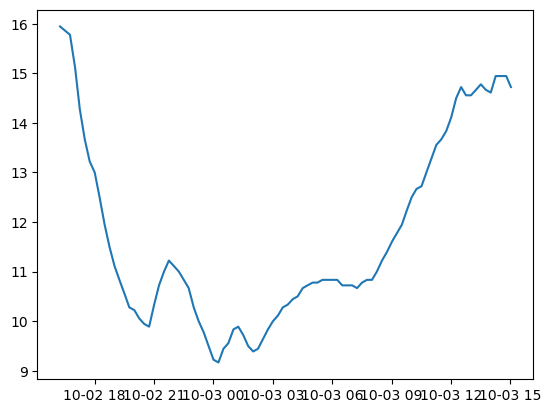

In [162]:
#fig, ax = plt.subplots()
createdDateTime = df["createdDateTime"]
dryBulbTemperature = df["dryBulbTemperature_Celsius"]
plt.plot(createdDateTime, dryBulbTemperature)
#plt.plot_date(df["createdDateTime"], df["dryBulbTemperature_Celcius"])
#ax.plot(df["createdDateTime"], df["dryBulbTemperature_Celsius"])
#ax.xaxis.axis_date
#ax.set(xlabel = "Dry Bulb Temperature(Celcius)", ylabel = "Time")

#I do not know how to include just time and not date
plt.show()